# Machine Learning with Python

## Homework 1
In part 1 of this homework we look at unsupervised learning, namely clustering methods 

In [6]:
from sklearn.datasets import fetch_openml

breast = fetch_openml(name='breast-w', version=1)

breast.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

We explore the data set

In [7]:
breast.feature_names

['Clump_Thickness',
 'Cell_Size_Uniformity',
 'Cell_Shape_Uniformity',
 'Marginal_Adhesion',
 'Single_Epi_Cell_Size',
 'Bare_Nuclei',
 'Bland_Chromatin',
 'Normal_Nucleoli',
 'Mitoses']

In [61]:
breast.target

0         benign
1         benign
2         benign
3         benign
4         benign
         ...    
694       benign
695       benign
696    malignant
697    malignant
698    malignant
Name: Class, Length: 699, dtype: category
Categories (2, object): ['benign', 'malignant']

In [17]:
breast.DESCR

'**Author**: Dr. William H. Wolberg, University of Wisconsin  \n**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)), [University of Wisconsin](http://pages.cs.wisc.edu/~olvi/uwmp/cancer.html) - 1995  \n**Please cite**: See below, plus [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)  \n\n**Breast Cancer Wisconsin (Original) Data Set.** Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The target feature records the prognosis (malignant or benign). [Original data available here](ftp://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/)  \n\nCurrent dataset was adapted to ARFF format from the UCI version. Sample code ID\'s were removed.  \n\n! Note that there is also a related Breast Cancer Wisconsin (Diagnosis) Data Set with a different set of features, better known as [wdbc](https://www.openml.org/d/1510).\n\n##

We now split data set into training and test data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(breast.data, breast.target,random_state=0)
print(X_train.shape)
print(X_test.shape)



(524, 9)
(175, 9)


### 1

Produce a visualisation of the whole dataset using a dimensionality reduction technique of your choice.

In [9]:
import matplotlib.pyplot as plt
import numpy as np

The data has missing values but dimensionality techniques do not work with data with missing values. To deal with this we use the scikit-learn method SimpleImputer to fill the unknown values with mean of the column values:

In [10]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer()
imp.fit(X_train)
X_imp = imp.transform(X_train)

X_imp

array([[ 8., 10.,  4., ...,  8.,  2.,  1.],
       [ 3.,  1.,  2., ...,  2.,  1.,  1.],
       [ 8., 10., 10., ...,  4.,  8.,  7.],
       ...,
       [ 4.,  1.,  1., ...,  1.,  1.,  1.],
       [ 5.,  1.,  1., ...,  2.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

We could have alternatively removed all the rows with missing entries, or used iterative regression modelling to try to guess the unknown values, based on the other features seen in that row

In [46]:
# Step 2: Drop rows with missing values in X
mask = X_train.notna().all(axis=1)  # Boolean mask: True for rows without NaNs

# Step 3: Apply mask to both X and y
X_clean = X_train[mask].to_numpy()
y_clean = y_train[mask].to_numpy()

print(X_clean.shape)

(511, 9)


First we use try to visualise all our features

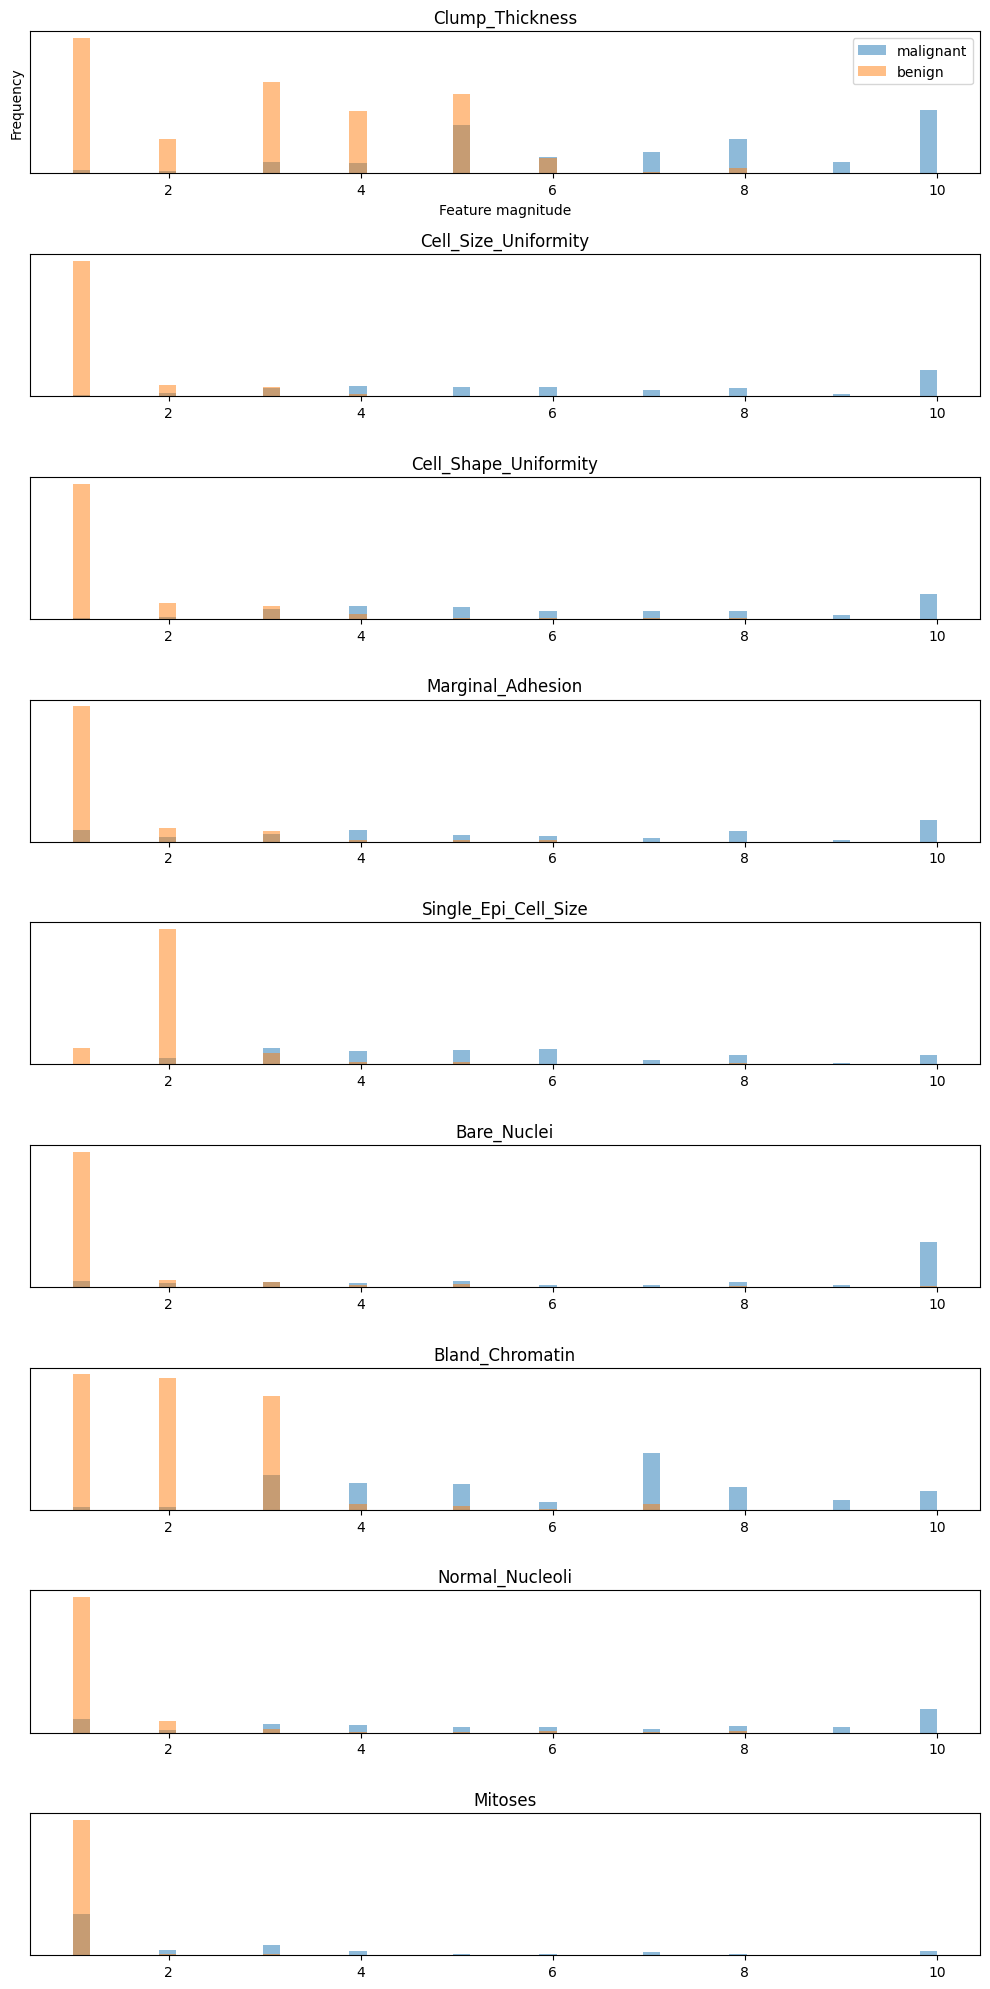

In [87]:
#can change X to be X_clean (rows deleted with missing values) or X_reg (data filled via regression) or X_imp (data imputated with average column values)
#if chosen X_clean, then y needs to be chosen to be y_clean. otherwise it is y_train
X = X_clean
y=y_clean


fig, axes = plt.subplots(9, 1, figsize=(10, 20))
malignant = X[y == 'malignant']
benign = X[y == 'benign']

ax = axes.ravel()
for i in range(9):
    column_data = X[:, i]
    
    _, bins = np.histogram(column_data, bins=50)
    ax[i].hist(malignant[:, i], bins=bins, alpha=0.5)
    ax[i].hist(benign[:, i], bins=bins, alpha=0.5)
    ax[i].set_title(breast.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()


Our features do seem to provide information that could help us differentiate between malignant and benign cancers, which is promising

For dimensionality techniques, it is also crucial to standardise

In [104]:
from sklearn.preprocessing import StandardScaler

# make a new Scaler object
scaler = StandardScaler()

# calling fit and transform in sequence (using method chaining)
scaler.fit(X)
X_scaled = scaler.transform(X)
# Apply the same transformation to test data for evaluations
X_test_scaled = scaler.transform(X_test)

C:\Users\miche\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


We first use PCA for dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components=2)

# fit PCA model to breast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.fit_transform(X_scaled)
# Apply the same transformation to test data for evaluations
X_test_reduced_pca = pca.transform(X_test_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (511, 9)
Reduced shape: (511, 2)


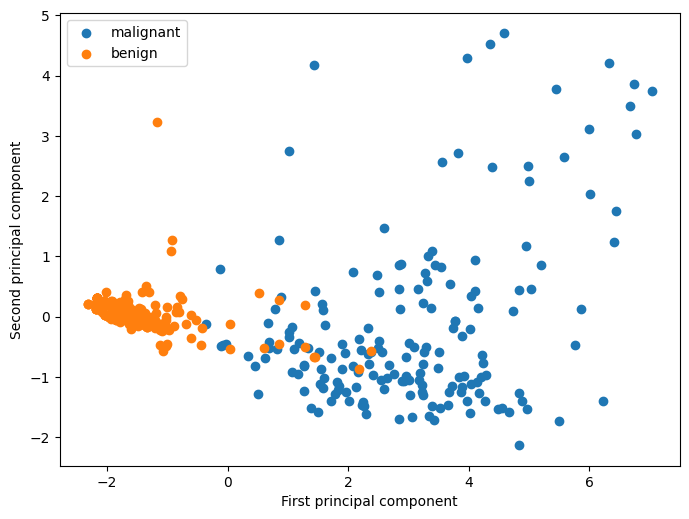

In [52]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[y=='malignant', 0], X_pca[y=='malignant', 1], label='malignant')
plt.scatter(X_pca[y=='benign', 0], X_pca[y=='benign', 1], label='benign')
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend()
plt.show()

We see that the PCA did not very nicely separate our classes as the orange and blue points overlap. We therefore try to use a non-linear approach: [t-SNE](https://scikit-learn.org/stable/modules/manifold.html#t-distributed-stochastic-neighbor-embedding-t-sne)

In [100]:
#had problems running this due to NaN entries that TSNE couldn't process:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
breast_tsne = tsne.fit_transform(X_scaled)

Text(0, 0.5, 't-SNE feature 1')

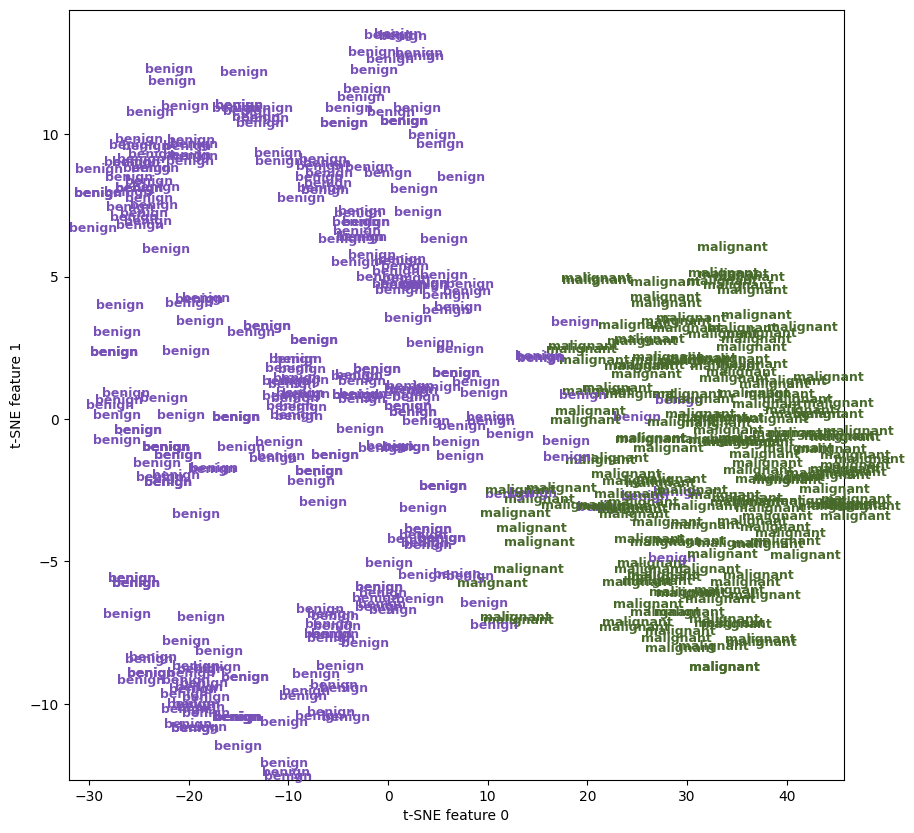

In [97]:
plt.figure(figsize=(10, 10))
plt.xlim(breast_tsne[:, 0].min(), breast_tsne[:, 0].max() + 1)
plt.ylim(breast_tsne[:, 1].min(), breast_tsne[:, 1].max() + 1)
colors = {'malignant':"#476A2A", 'benign':"#7851B8"}
for i in range(len(breast_tsne)):
    # actually plot the breast dataas text instead of using scatter
    label = y[i]
    plt.text(breast_tsne[i, 0], breast_tsne[i, 1], label, 
             color = colors[label], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

This looks slightly better but the separation between the clusters is not perfect. We therefre don't expect any clustering method to perfectly separate the classes, but we will try them.

### 2
Clustering methods

First we try the simplest type of clusting, k-means clustering

In [62]:
from sklearn.cluster import KMeans

# build the clustering model
kmeans = KMeans(n_clusters=2)
kmeans.fit(breast_tsne)

KMeans(n_clusters=2)

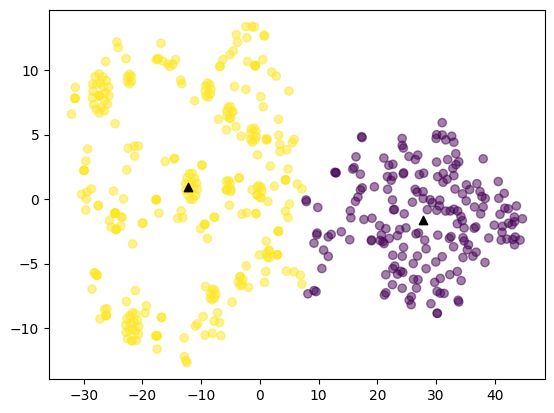

In [63]:
plt.scatter(breast_tsne[:, 0], breast_tsne[:, 1], c=kmeans.labels_, alpha=0.5)
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    c='k',
    marker='^')
plt.show()

The k-means clusting already appears to work as well as we could have hoped.

We try different clustering methods too though, for example Agglomerative Clustering:

Text(0, 0.5, 'Feature 1')

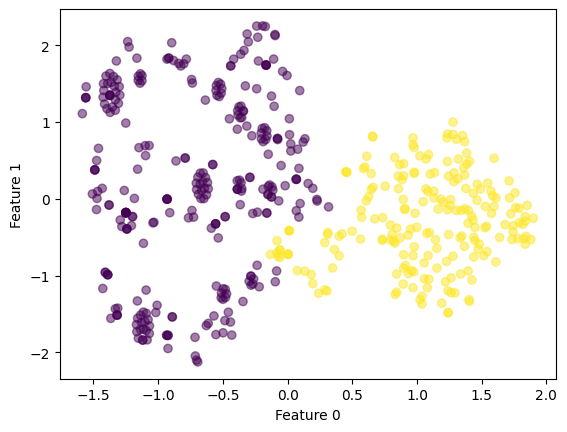

In [80]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2)
assignment = agg.fit_predict(breast_tsne)

plt.scatter(breast_tsne[:, 0], breast_tsne[:, 1], c=assignment, alpha=0.5)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In some sense, this looks worse that the results of k-means, as fringe cases are labelled as benign rather than malignant. We would prefer if fringe cases were flagged as risky.

Lastly, we try DBSCAN clustering, where we do not need to specify the number of clusters in advance. 

In [65]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
clusters = dbscan.fit_predict(breast_tsne)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1
  0  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

The cluster label `-1` means "noise"!

There were no regions of the data that were considered "dense", under the default settings.

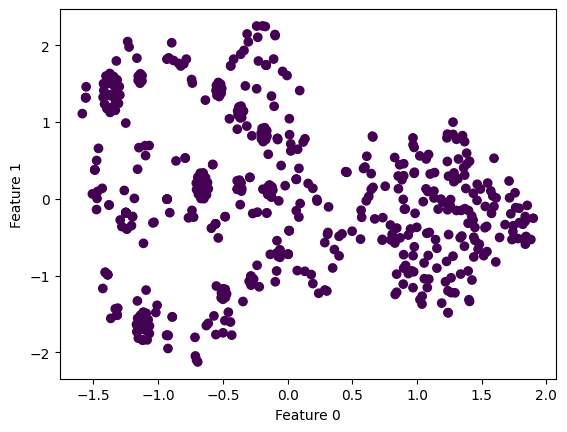

In [66]:
# Rescale the data to zero mean and unit variance to try to fix the 'noise' problem
scaler = StandardScaler()
scaler.fit(breast_tsne)
breast_tsne = scaler.transform(breast_tsne)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(breast_tsne)
# plot the cluster assignments
plt.scatter(breast_tsne[:, 0], breast_tsne[:, 1], c=clusters)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

So DSCAN totally failed in this example.

We can use methods from scikit-learn to give numerical evaluations. In our example we have the ground truth so we will be using the Adjusted Rand Index (ARI).

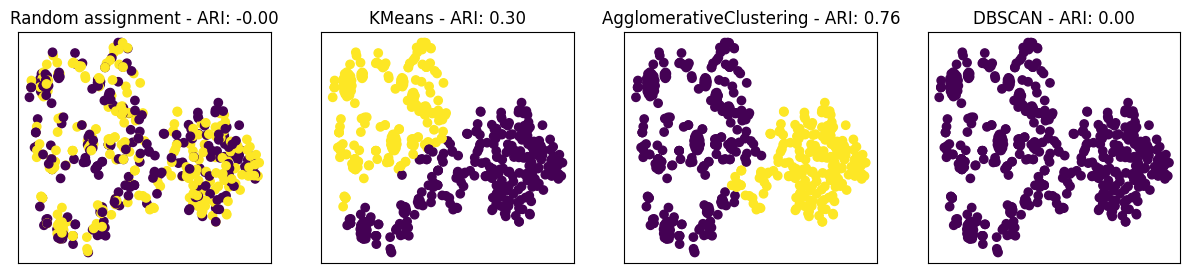

In [69]:
from sklearn.metrics.cluster import adjusted_rand_score


fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(breast_tsne))

# plot random assignment
axes[0].scatter(breast_tsne[:, 0], breast_tsne[:, 1], c=random_clusters,
                )
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(breast_tsne)
    ax.scatter(breast_tsne[:, 0], breast_tsne[:, 1], c=clusters)
    ax.set_title("{} - ARI: {:.2f}".format(
        algorithm.__class__.__name__,                      
        adjusted_rand_score(y, clusters)))

## Homework 2
In part 2 of this homework we look at supervised learning, in this example classification.

We start with kNN classification

In [78]:
from sklearn.neighbors import KNeighborsClassifier
k = 1
knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
knn.fit(breast_tsne,y)

KNeighborsClassifier(n_neighbors=1)

In [92]:
def plot_boundary(model,X_p,y_p,title):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    h = 0.05
    x_min, x_max = breast_tsne[:, 0].min() - 1, breast_tsne[:, 0].max() + 1
    y_min, y_max = breast_tsne[:, 1].min() - 1, breast_tsne[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.where(Z == 'malignant', 0, 1)  #changing Z to be numerical as contourf cannot take strings
    Z = Z.reshape(xx.shape)


    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, alpha=0.2)

    # Plot also the training points
    color_map = {'malignant': 'red', 'benign': 'blue'}
    colors = [color_map[label] for label in y_p]

    plt.scatter(X_p[:, 0], X_p[:, 1], c=colors, edgecolor='k')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.show()

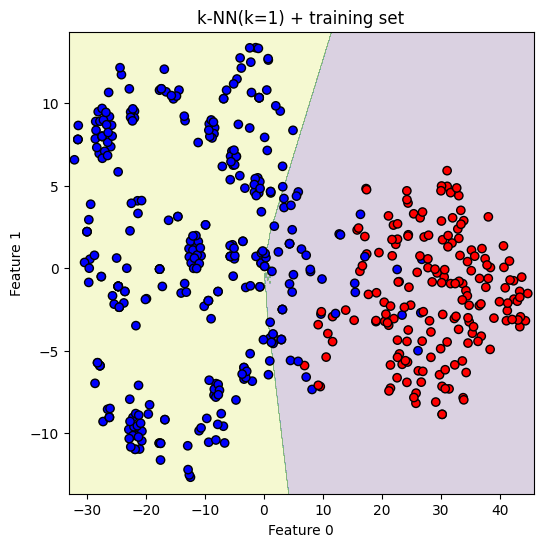

In [93]:
plot_boundary(knn,breast_tsne,y,"k-NN(k=" + str(k) + ") + training set")

That did not work very well, so we try a neural network:

In [94]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(10,50),max_iter=10000,random_state=0)
nn.fit(breast_tsne,y)

MLPClassifier(hidden_layer_sizes=(10, 50), max_iter=10000, random_state=0)

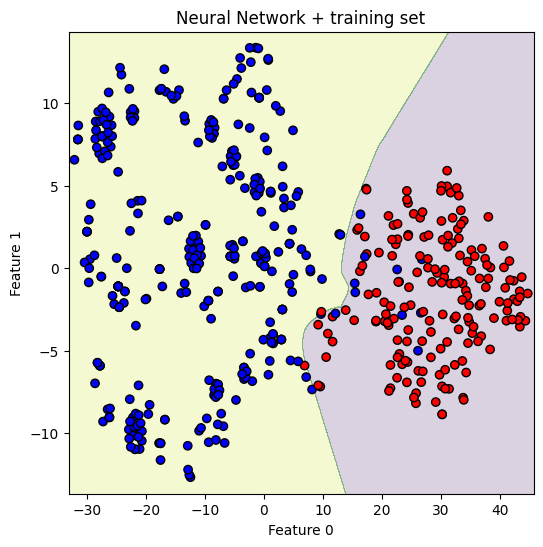

In [95]:
plot_boundary(nn,breast_tsne,y,"Neural Network + training set")

## Homework 3
In part 3 of this homework we evaluate our classifications.

We would like to use the precision-recall (PR) curve is also a useful evaluation for tasks where we are most interested in eliminating false positives, e.g. screening a population for a disease.

We have an issue: we cannot apply the TSNE dimensionality transformation directly onto the test data (does not have the /transform method that PCA has), which means we cannot easily find out what the problem predicts on our test set. This is very problematic for evaluations.

We could look at the PCA dimensionality instead. Or the best we can do using TSNE is apply it to the entire data set (training and test) and also test our models on the training set or a random sample of it... This however leaks information and makes our evaluation not valid for real generalization.

In [107]:
probs_knn = knn.predict_proba(breast_tsne)
probs_nn = nn.predict_proba(breast_tsne)

In [ ]:
#need to change output/target to numerical again
y = np.where(y == 'malignant', 0, 1) 

Plot the PR curve for the knn classifier

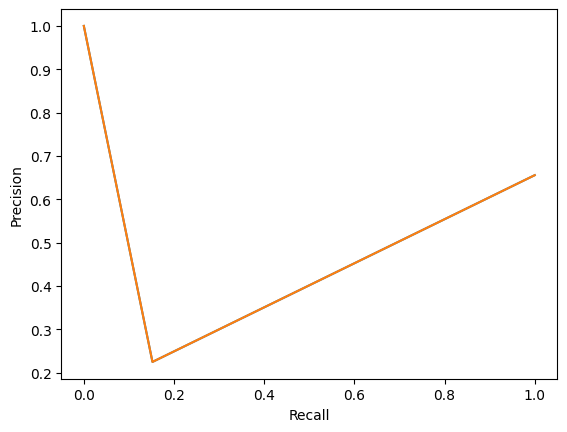

In [115]:
from sklearn.metrics import precision_recall_curve

pre,rec,thresholds = precision_recall_curve(y,probs_knn[:,1])

plt.plot(rec,pre)
plt.plot(rec,pre)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


plot the PR curve for the neural network classifier

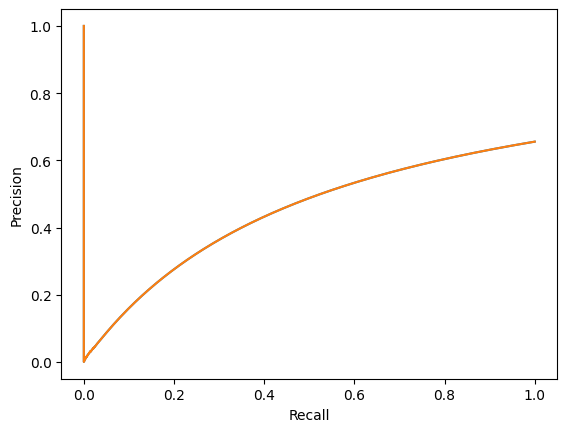

In [116]:
pre,rec,thresholds = precision_recall_curve(y,probs_nn[:,1])
plt.plot(rec,pre)
plt.plot(rec,pre)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


The [weighted average precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score) over this curve is often quoted as a metric:

In [118]:
from sklearn.metrics import average_precision_score
avg_pre_knn = average_precision_score(y, probs_knn[:,1])
avg_pre_nn = average_precision_score(y, probs_nn[:,1])
print("Average precision knn =",avg_pre_knn)
print("Average precision NN =",avg_pre_nn)

Average precision knn = 0.5899764263074739
Average precision NN = 0.4413966580207707
